# Homework 2: Data Exploration and Regression 
by Francisco Reveriano

# Load Libraries  

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tqdm.notebook import trange, tqdm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-1" data-toc-modified-id="Problem-1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem 1</a></span><ul class="toc-item"><li><span><a href="#Question-A:-Data-Cleaning" data-toc-modified-id="Question-A:-Data-Cleaning-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Question A: Data Cleaning</a></span><ul class="toc-item"><li><span><a href="#Load-the-Dataset" data-toc-modified-id="Load-the-Dataset-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Load the Dataset</a></span></li><li><span><a href="#Drop-Unnecessary-Columns" data-toc-modified-id="Drop-Unnecessary-Columns-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Drop Unnecessary Columns</a></span></li><li><span><a href="#Clean-the-Dataset" data-toc-modified-id="Clean-the-Dataset-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Clean the Dataset</a></span></li></ul></li><li><span><a href="#Question-B:-Price-vs-Features-(Scatterplots)" data-toc-modified-id="Question-B:-Price-vs-Features-(Scatterplots)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Question B: Price vs Features (Scatterplots)</a></span><ul class="toc-item"><li><span><a href="#Wheel-Base-vs-Price" data-toc-modified-id="Wheel-Base-vs-Price-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Wheel-Base vs Price</a></span></li><li><span><a href="#Length-vs-Price" data-toc-modified-id="Length-vs-Price-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Length vs Price</a></span></li><li><span><a href="#Width-vs-Price" data-toc-modified-id="Width-vs-Price-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Width vs Price</a></span></li><li><span><a href="#Height-vs-Price" data-toc-modified-id="Height-vs-Price-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Height vs Price</a></span></li><li><span><a href="#Curb-Weight-vs-Price" data-toc-modified-id="Curb-Weight-vs-Price-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>Curb-Weight vs Price</a></span></li><li><span><a href="#Engine-Size-vs-Price" data-toc-modified-id="Engine-Size-vs-Price-1.2.6"><span class="toc-item-num">1.2.6&nbsp;&nbsp;</span>Engine-Size vs Price</a></span></li><li><span><a href="#Bore-vs-Price" data-toc-modified-id="Bore-vs-Price-1.2.7"><span class="toc-item-num">1.2.7&nbsp;&nbsp;</span>Bore vs Price</a></span></li><li><span><a href="#Stroke-vs-Price" data-toc-modified-id="Stroke-vs-Price-1.2.8"><span class="toc-item-num">1.2.8&nbsp;&nbsp;</span>Stroke vs Price</a></span></li><li><span><a href="#Compression-Ratio-vs-Price" data-toc-modified-id="Compression-Ratio-vs-Price-1.2.9"><span class="toc-item-num">1.2.9&nbsp;&nbsp;</span>Compression-Ratio vs Price</a></span></li><li><span><a href="#Horsepower-vs-Price" data-toc-modified-id="Horsepower-vs-Price-1.2.10"><span class="toc-item-num">1.2.10&nbsp;&nbsp;</span>Horsepower vs Price</a></span></li><li><span><a href="#Peak-RPM-vs-Price" data-toc-modified-id="Peak-RPM-vs-Price-1.2.11"><span class="toc-item-num">1.2.11&nbsp;&nbsp;</span>Peak-RPM vs Price</a></span></li><li><span><a href="#City-MPG-vs-Price" data-toc-modified-id="City-MPG-vs-Price-1.2.12"><span class="toc-item-num">1.2.12&nbsp;&nbsp;</span>City-MPG vs Price</a></span></li><li><span><a href="#Highway-MPG-vs-Price" data-toc-modified-id="Highway-MPG-vs-Price-1.2.13"><span class="toc-item-num">1.2.13&nbsp;&nbsp;</span>Highway-MPG vs Price</a></span></li></ul></li><li><span><a href="#Question-C:-(Feature-Prediction)" data-toc-modified-id="Question-C:-(Feature-Prediction)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Question C: (Feature Prediction)</a></span></li><li><span><a href="#Question-D:-Correlation-Plots" data-toc-modified-id="Question-D:-Correlation-Plots-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Question D: Correlation Plots</a></span></li><li><span><a href="#Question-E:-Related-Variables" data-toc-modified-id="Question-E:-Related-Variables-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Question E: Related Variables</a></span></li></ul></li><li><span><a href="#Problem-2" data-toc-modified-id="Problem-2-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Problem 2</a></span><ul class="toc-item"><li><span><a href="#Question-A:-Proposed-Linear-Models" data-toc-modified-id="Question-A:-Proposed-Linear-Models-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Question A: Proposed Linear Models</a></span><ul class="toc-item"><li><span><a href="#Question-B:-Analyzing-First-Model" data-toc-modified-id="Question-B:-Analyzing-First-Model-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Question B: Analyzing First Model</a></span><ul class="toc-item"><li><span><a href="#i)-Perform-Linear-Regression" data-toc-modified-id="i)-Perform-Linear-Regression-2.1.1.1"><span class="toc-item-num">2.1.1.1&nbsp;&nbsp;</span>i) Perform Linear Regression</a></span></li><li><span><a href="#ii)-R2" data-toc-modified-id="ii)-R2-2.1.1.2"><span class="toc-item-num">2.1.1.2&nbsp;&nbsp;</span>ii) R2</a></span></li><li><span><a href="#iii)-Scatterplot" data-toc-modified-id="iii)-Scatterplot-2.1.1.3"><span class="toc-item-num">2.1.1.3&nbsp;&nbsp;</span>iii) Scatterplot</a></span></li><li><span><a href="#iv)-Impression-of-Model" data-toc-modified-id="iv)-Impression-of-Model-2.1.1.4"><span class="toc-item-num">2.1.1.4&nbsp;&nbsp;</span>iv) Impression of Model</a></span></li></ul></li><li><span><a href="#Question-C:-Proposed-Model-#2" data-toc-modified-id="Question-C:-Proposed-Model-#2-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Question C: Proposed Model #2</a></span><ul class="toc-item"><li><span><a href="#i)-Perform-Linear-Regression" data-toc-modified-id="i)-Perform-Linear-Regression-2.1.2.1"><span class="toc-item-num">2.1.2.1&nbsp;&nbsp;</span>i) Perform Linear Regression</a></span></li><li><span><a href="#ii)-R2" data-toc-modified-id="ii)-R2-2.1.2.2"><span class="toc-item-num">2.1.2.2&nbsp;&nbsp;</span>ii) R2</a></span></li><li><span><a href="#iii)-Scatterplot" data-toc-modified-id="iii)-Scatterplot-2.1.2.3"><span class="toc-item-num">2.1.2.3&nbsp;&nbsp;</span>iii) Scatterplot</a></span></li><li><span><a href="#iv)-Impression-of-Model" data-toc-modified-id="iv)-Impression-of-Model-2.1.2.4"><span class="toc-item-num">2.1.2.4&nbsp;&nbsp;</span>iv) Impression of Model</a></span></li></ul></li><li><span><a href="#Question-D:-Proposed-Model-#3" data-toc-modified-id="Question-D:-Proposed-Model-#3-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Question D: Proposed Model #3</a></span><ul class="toc-item"><li><span><a href="#ii)-R2" data-toc-modified-id="ii)-R2-2.1.3.1"><span class="toc-item-num">2.1.3.1&nbsp;&nbsp;</span>ii) R2</a></span></li><li><span><a href="#iii)-Scatterplot" data-toc-modified-id="iii)-Scatterplot-2.1.3.2"><span class="toc-item-num">2.1.3.2&nbsp;&nbsp;</span>iii) Scatterplot</a></span></li><li><span><a href="#iv)-Impression-of-Model" data-toc-modified-id="iv)-Impression-of-Model-2.1.3.3"><span class="toc-item-num">2.1.3.3&nbsp;&nbsp;</span>iv) Impression of Model</a></span></li></ul></li><li><span><a href="#Question-E:-Which-model?" data-toc-modified-id="Question-E:-Which-model?-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Question E: Which model?</a></span></li></ul></li></ul></li></ul></div>

## Problem 1

### Question A: Data Cleaning


#### Load the Dataset

In [2]:
# The first part is reading the dataset. With Pandas I can treat the dataset as if it was a .csv file. 
data = pd.read_csv("imports-85.data", header=None)

# At this point the dataset has no header. It is easier for me to place a header to make it easier to choose columns
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

# We add the headers to the table to make it readable. 
data.columns = headers

In [3]:
# We proceed to check if our panda was loaded correctly
print(data.head(5))

   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio hor

#### Drop Unnecessary Columns

In [4]:
# We can see that there are 26 columns. This means that we need to delete them. And use only the columns we have been assigned. 
# So in other words we are dropping the columns using the panda drop command function. 
data = data.drop(columns=["symboling", "normalized-losses", "make", "fuel-type", "aspiration", 
                          "num-of-doors", "body-style", "drive-wheels", "engine-location"
                          ,"engine-type", "num-of-cylinders", "fuel-system"])

# We proceed to print to check that we have the correct number of columns
print(data.head(5))

   wheel-base  length  width  height  curb-weight  engine-size  bore stroke  \
0        88.6   168.8   64.1    48.8         2548          130  3.47   2.68   
1        88.6   168.8   64.1    48.8         2548          130  3.47   2.68   
2        94.5   171.2   65.5    52.4         2823          152  2.68   3.47   
3        99.8   176.6   66.2    54.3         2337          109  3.19   3.40   
4        99.4   176.6   66.4    54.3         2824          136  3.19   3.40   

   compression-ratio horsepower peak-rpm  city-mpg  highway-mpg  price  
0                9.0        111     5000        21           27  13495  
1                9.0        111     5000        21           27  16500  
2                9.0        154     5000        19           26  16500  
3               10.0        102     5500        24           30  13950  
4                8.0        115     5500        18           22  17450  


#### Clean the Dataset

The objective is to remove the datapoints  for which the target variable (price) is unknown


In [5]:
# First we will count how many data points there are. 
total_rows = len(data.axes[0])
total_columns = len(data.axes[1])
print("Original Total Rows:", total_rows)
print("Original Total Columns:", total_columns)

Original Total Rows: 205
Original Total Columns: 14


In [42]:
# We now proceed to reformat the dataset by first turning all the '?' into 'NaN'
data["price"] = pd.to_numeric(data["price"], errors='coerce')
#data["bore"] = pd.to_numeric(data["bore"], errors='coerce')
# We then proceed to drop the NaN
data = data.dropna(subset=["price"], axis = 0)
#data = data.dropna(subset=["bore"], axis= 0)
data = data.dropna()

# Make a copy of the model
Model = data.copy()

In [7]:
# We now proceed to re-count the data points. 
total_rows = len(data.axes[0])
total_columns = len(data.axes[1])
print("Final Total Rows:", total_rows)
print("Final Total Columns:", total_columns)


Final Total Rows: 201
Final Total Columns: 14


So we can see that we have successfully drop the 4 rows that have '?'. This means that we only have the rows that have 'price'. So as we can see there are only 201 data points left after cleaning the dataset. 

### Question B: Price vs Features (Scatterplots)

Before proceeding to scatterplots. I think its important to look at some descriptory statistics of price. We can see that that we have 201 variables. More importantly the mean is $13,207.12 with a standard deviation of 7947.06. So we can easily see that there is quite some deviation and this dataset has both low/mid/and high range priced cars. 

In [8]:
data[['price']].describe()

,price
count,201.000000
mean,13207.129353
std,7947.066342
min,5118.000000
25%,7775.000000
50%,10295.000000
75%,16500.000000
max,45400.000000


#### Wheel-Base vs Price

Here I proceed to analyze the wheelbase and price. Just by looking at the graph there does not appear to be any direct correlation. 

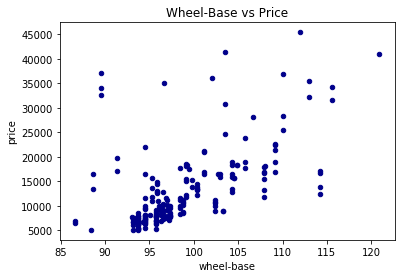

In [9]:
ax1 = data.plot.scatter(x='wheel-base', y='price', c='DarkBlue', title="Wheel-Base vs Price")

The correlation between Wheel-Base and Price is: 

In [10]:
print("Correlation:", round(data['wheel-base'].corr(data['price']),2))

Correlation: 0.58


The graph and correlation analysis shows that there is no clear correlation between the wheel-base and price. So this feature should not be very relevant. 

#### Length vs Price

Correlation: 0.69


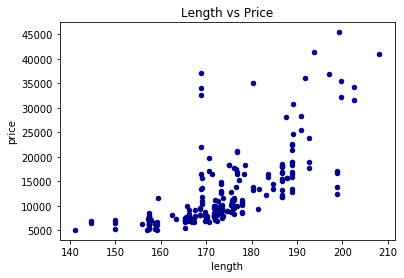

In [11]:
ax2 = data.plot.scatter(x='length', y='price', c='DarkBlue', title="Length vs Price")
print("Correlation:", round(data['length'].corr(data['price']),2))

There appears to be some sort of relationship between the length of the vehicle and its final price. We can see that the price increases as the vehicle becomes longer. This is reflected by the 0.69 correlation. Although not a strong or extremely significant impact it is obvious that there is a relationship. 

#### Width vs Price

Correlation: 0.75


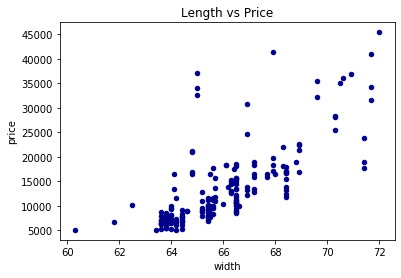

In [12]:
ax2 = data.plot.scatter(x='width', y='price', c='DarkBlue', title="Length vs Price")
print("Correlation:", round(data['width'].corr(data['price']),2))

The weidh has more significance then the length of the vehicle. This is seen by the relationship in the graph and reinforced by the .75 correlation. Although this is a strong relationship this might not be the strongest relationship. 

#### Height vs Price

Correlation: 0.14


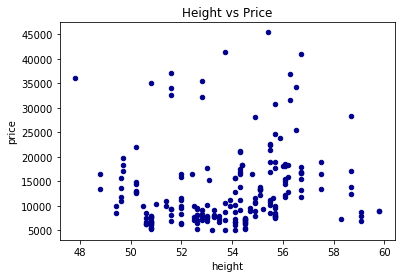

In [13]:
ax2 = data.plot.scatter(x='height', y='price', c='DarkBlue', title="Height vs Price")
print("Correlation:", round(data['height'].corr(data['price']),2))

It is obvious that height does not matter. There is no relationship visible in the graph. This is confirmed by the extremely low correlation value.

#### Curb-Weight vs Price

Correlation: 0.83


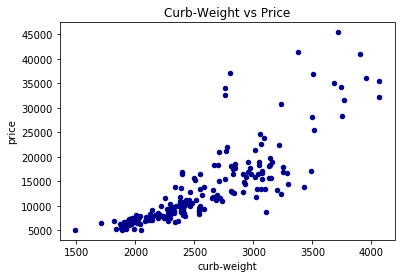

In [14]:
ax2 = data.plot.scatter(x='curb-weight', y='price', c='DarkBlue', title="Curb-Weight vs Price")
print("Correlation:", round(data['curb-weight'].corr(data['price']),2))

There is strong relationship between the curb-weight and price. This is clearly seen in the graph and supported by the correlation analysis. 

#### Engine-Size vs Price

Correlation: 0.87


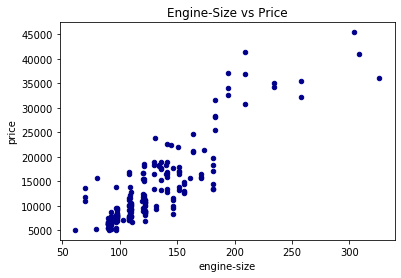

In [15]:
ax2 = data.plot.scatter(x='engine-size', y='price', c='DarkBlue', title="Engine-Size vs Price")
print("Correlation:", round(data['engine-size'].corr(data['price']),2))

The engine-size clearly matters. After all its all about horsepower. We can see a clear relationship where the big-engines and price matters. This is seen by the 0.87 correlation. 

#### Bore vs Price 

Correlation: 0.54


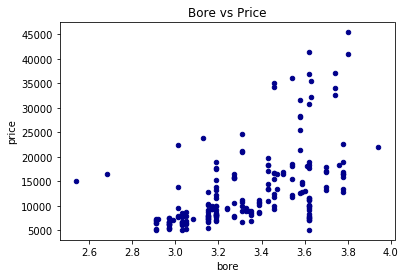

In [16]:
# Need to Convert the Bore data into numeric format to allow for graphing. 
data["bore"] = pd.to_numeric(data["bore"], errors='coerce')

# Then I can proceed to effectively graph and calculate the correlation. 
ax2 = data.plot.scatter(x='bore', y='price', c='DarkBlue', title="Bore vs Price")
print("Correlation:", round(data['bore'].corr(data['price']),2))

The bore data has no significance to this. We can clearly see that there is no relationship. And this is proven by the correlation analysis. 

#### Stroke vs Price

Correlation: 0.08


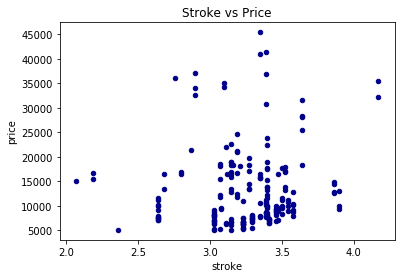

In [17]:
# Need to Convert the Stroke data into numeric format to allow for graphing. 
data["stroke"] = pd.to_numeric(data["stroke"], errors='coerce')

# Then I can proceed to effectively graph and calculate the correlation. 
ax2 = data.plot.scatter(x='stroke', y='price', c='DarkBlue', title="Stroke vs Price")
print("Correlation:", round(data['stroke'].corr(data['price']),2))

Stroke does not matter. An has no real impact on the price. 

#### Compression-Ratio vs Price

Correlation: 0.07


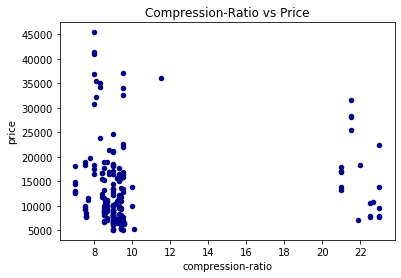

In [18]:
# Need to Convert the Stroke data into numeric format to allow for graphing. 
data["compression-ratio"] = pd.to_numeric(data["compression-ratio"], errors='coerce')

# Then I can proceed to effectively graph and calculate the correlation. 
ax2 = data.plot.scatter(x='compression-ratio', y='price', c='DarkBlue', title="Compression-Ratio vs Price")
print("Correlation:", round(data['compression-ratio'].corr(data['price']),2))

The compression ratio is completely meaningless. Both the graph and correlation prove this. 

#### Horsepower vs Price

Correlation: 0.81


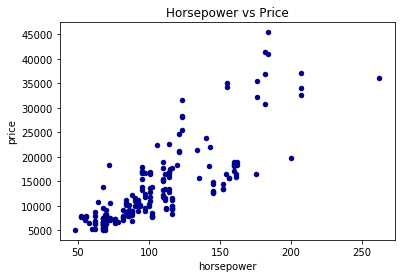

In [19]:
# Need to Convert the Stroke data into numeric format to allow for graphing. 
data["horsepower"] = pd.to_numeric(data["horsepower"], errors='coerce')

# Then I can proceed to effectively graph and calculate the correlation. 
ax2 = data.plot.scatter(x='horsepower', y='price', c='DarkBlue', title="Horsepower vs Price")
print("Correlation:", round(data['horsepower'].corr(data['price']),2))

Horsepower matters!

#### Peak-RPM vs Price

Correlation: -0.1


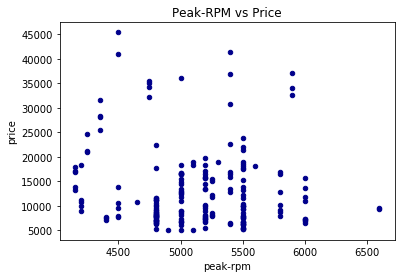

In [20]:
# Need to Convert the Stroke data into numeric format to allow for graphing. 
data["peak-rpm"] = pd.to_numeric(data["peak-rpm"], errors='coerce')

# Then I can proceed to effectively graph and calculate the correlation. 
ax2 = data.plot.scatter(x='peak-rpm', y='price', c='DarkBlue', title="Peak-RPM vs Price")
print("Correlation:", round(data['peak-rpm'].corr(data['price']),2))

What is peak-rpm? Because there is no relationship and it is obvious that it does not matter. As we can see in graph and correlation function.

#### City-MPG vs Price

Correlation: -0.69


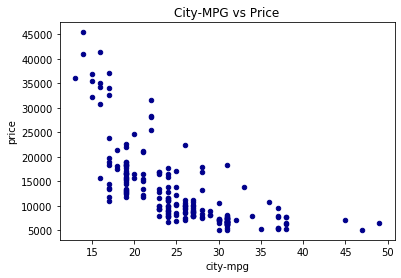

In [21]:
# Need to Convert the Stroke data into numeric format to allow for graphing. 
data["city-mpg"] = pd.to_numeric(data["city-mpg"], errors='coerce')

# Then I can proceed to effectively graph and calculate the correlation. 
ax2 = data.plot.scatter(x='city-mpg', y='price', c='DarkBlue', title="City-MPG vs Price")
print("Correlation:", round(data['city-mpg'].corr(data['price']),2))

it seems that there is a relationship. A surprising one! The higher the mpg the lower the price. The lower the pmg the higher the price. Some more testing should clear this up. 

Correlation: -0.82


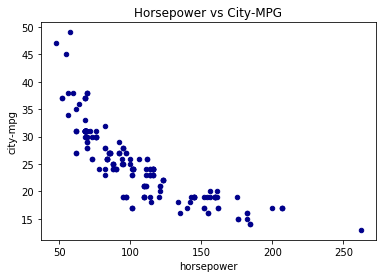

In [22]:
# Compare MPG with the Horsepower
ax2 = data.plot.scatter(x='horsepower', y='city-mpg', c='DarkBlue', title="Horsepower vs City-MPG")
print("Correlation:", round(data['city-mpg'].corr(data['horsepower']),2))

So we can see that horsepower matters. There is a clear correlation between horsepower and city-mpg. 

#### Highway-MPG vs Price

Correlation: -0.7


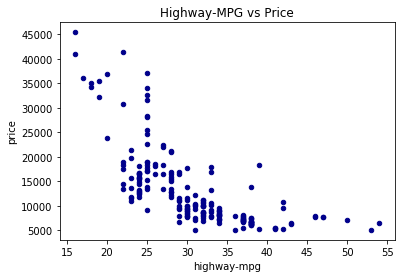

In [23]:
# Need to Convert the Stroke data into numeric format to allow for graphing. 
data["highway-mpg"] = pd.to_numeric(data["highway-mpg"], errors='coerce')

# Then I can proceed to effectively graph and calculate the correlation. 
ax2 = data.plot.scatter(x='highway-mpg', y='price', c='DarkBlue', title="Highway-MPG vs Price")
print("Correlation:", round(data['highway-mpg'].corr(data['price']),2))

We see the same relationship as before. There is a relationship, all be it a negative one. A greater MPG impacts the price negatively. 

### Question C: (Feature Prediction)

- Wheel-Base vs. Price
    - feature does not hold promise for predicting a car's price
    - the graph and correlation analysis do not show any real connection
    - there does not appear to be a real relationship
- Length vs. Price
    - feature does appear to hold  promise for predicting a car's price
    - correlation was 0.69 and the graph showed some linear trends
    - A larger car will naturally cost more than a smaller car
- Width vs. Price
    - feature does appear to hold promise for predicting a car's price
    - correlation was 0.75 and the graph showed some linear trends
    - This goes with the statement above that a wider car will naturally cost more. 
- Height vs. Price
    - feature is utterly insignificant and there is absolutely no relationship
- Curb-Weight vs. Price
    - Curb weight had a correlation of 0.83 
    - The graph also showed a linear relationship
    - it is obvious that this relationship is very important
- Engine-Size vs. Price
    - Engine-Size is very important and had a correlation of 0.87
    - This obvious in the linear relationship in the graph
    - This might be one of the most important relationships
- Bore vs. Price
    - Bore vs Price has no clear relationship
    - The correlation was only 0.5 
    - So there is some impact but it is not super significant
    - I don't think this holds an important relationship in predicting the price
- Stroke vs. Price
    - What is stroke? 
    - This relationship was utterly useless 
    - We can see this in the graph and correlation
    - Does not hold the promise for predicting a car's price
- Compression-Ratio vs. Price
    - Compression-ration is insignificant 
    - I have never been to a parking lot and asked myself "I am going to choose a car by the compression ratio"
    - The graph shows no relationship
    - The correlation was insignificant 
- Horsepower vs. Price
    - Horsepower Matter!
    - This is a very important relationship
    - We can see this in the graph and correlation of 0.81
    - Most importantly the graph shows a linear relationship
- Peak-RPM vs. Price
    - Peak-RPM is utterly useless
    - there is no clear relationship visible in the graph and is confirmed by the -0.1 correlation 
    - This one should be dropped
- City-MPG vs. Price
    - The city-mpg has a correlation of -0.69
    - Most importantly it seems that a high city-mpg has a negative effect 
    - I think this feature is heavily correlated with horsepower
    - so on its own it is relatively ineffective
- Highway-MPG vs. Price
    - Highway MPG is the same as the City-MPG in that it has a negative impact
    - There is somewhat of a relationship that appears to be linear
    - The higher the MPG the lower the price 
    - I think this feature can be reduced and just incorporate horsepower

### Question D: Correlation Plots

The objective of this question is to graph the correlations of each variable against each other. The result is going to be a ton of plots. So for that I am going to use seaborn.

A correlation matrix (correlolgram) allows us to analyze the relationship between each pair of numerical variables of a matrix. The correlation between each pair of variable is visualise through a scatterplot. 

/home/franciscoAML/anaconda3/envs/AI/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/franciscoAML/anaconda3/envs/AI/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


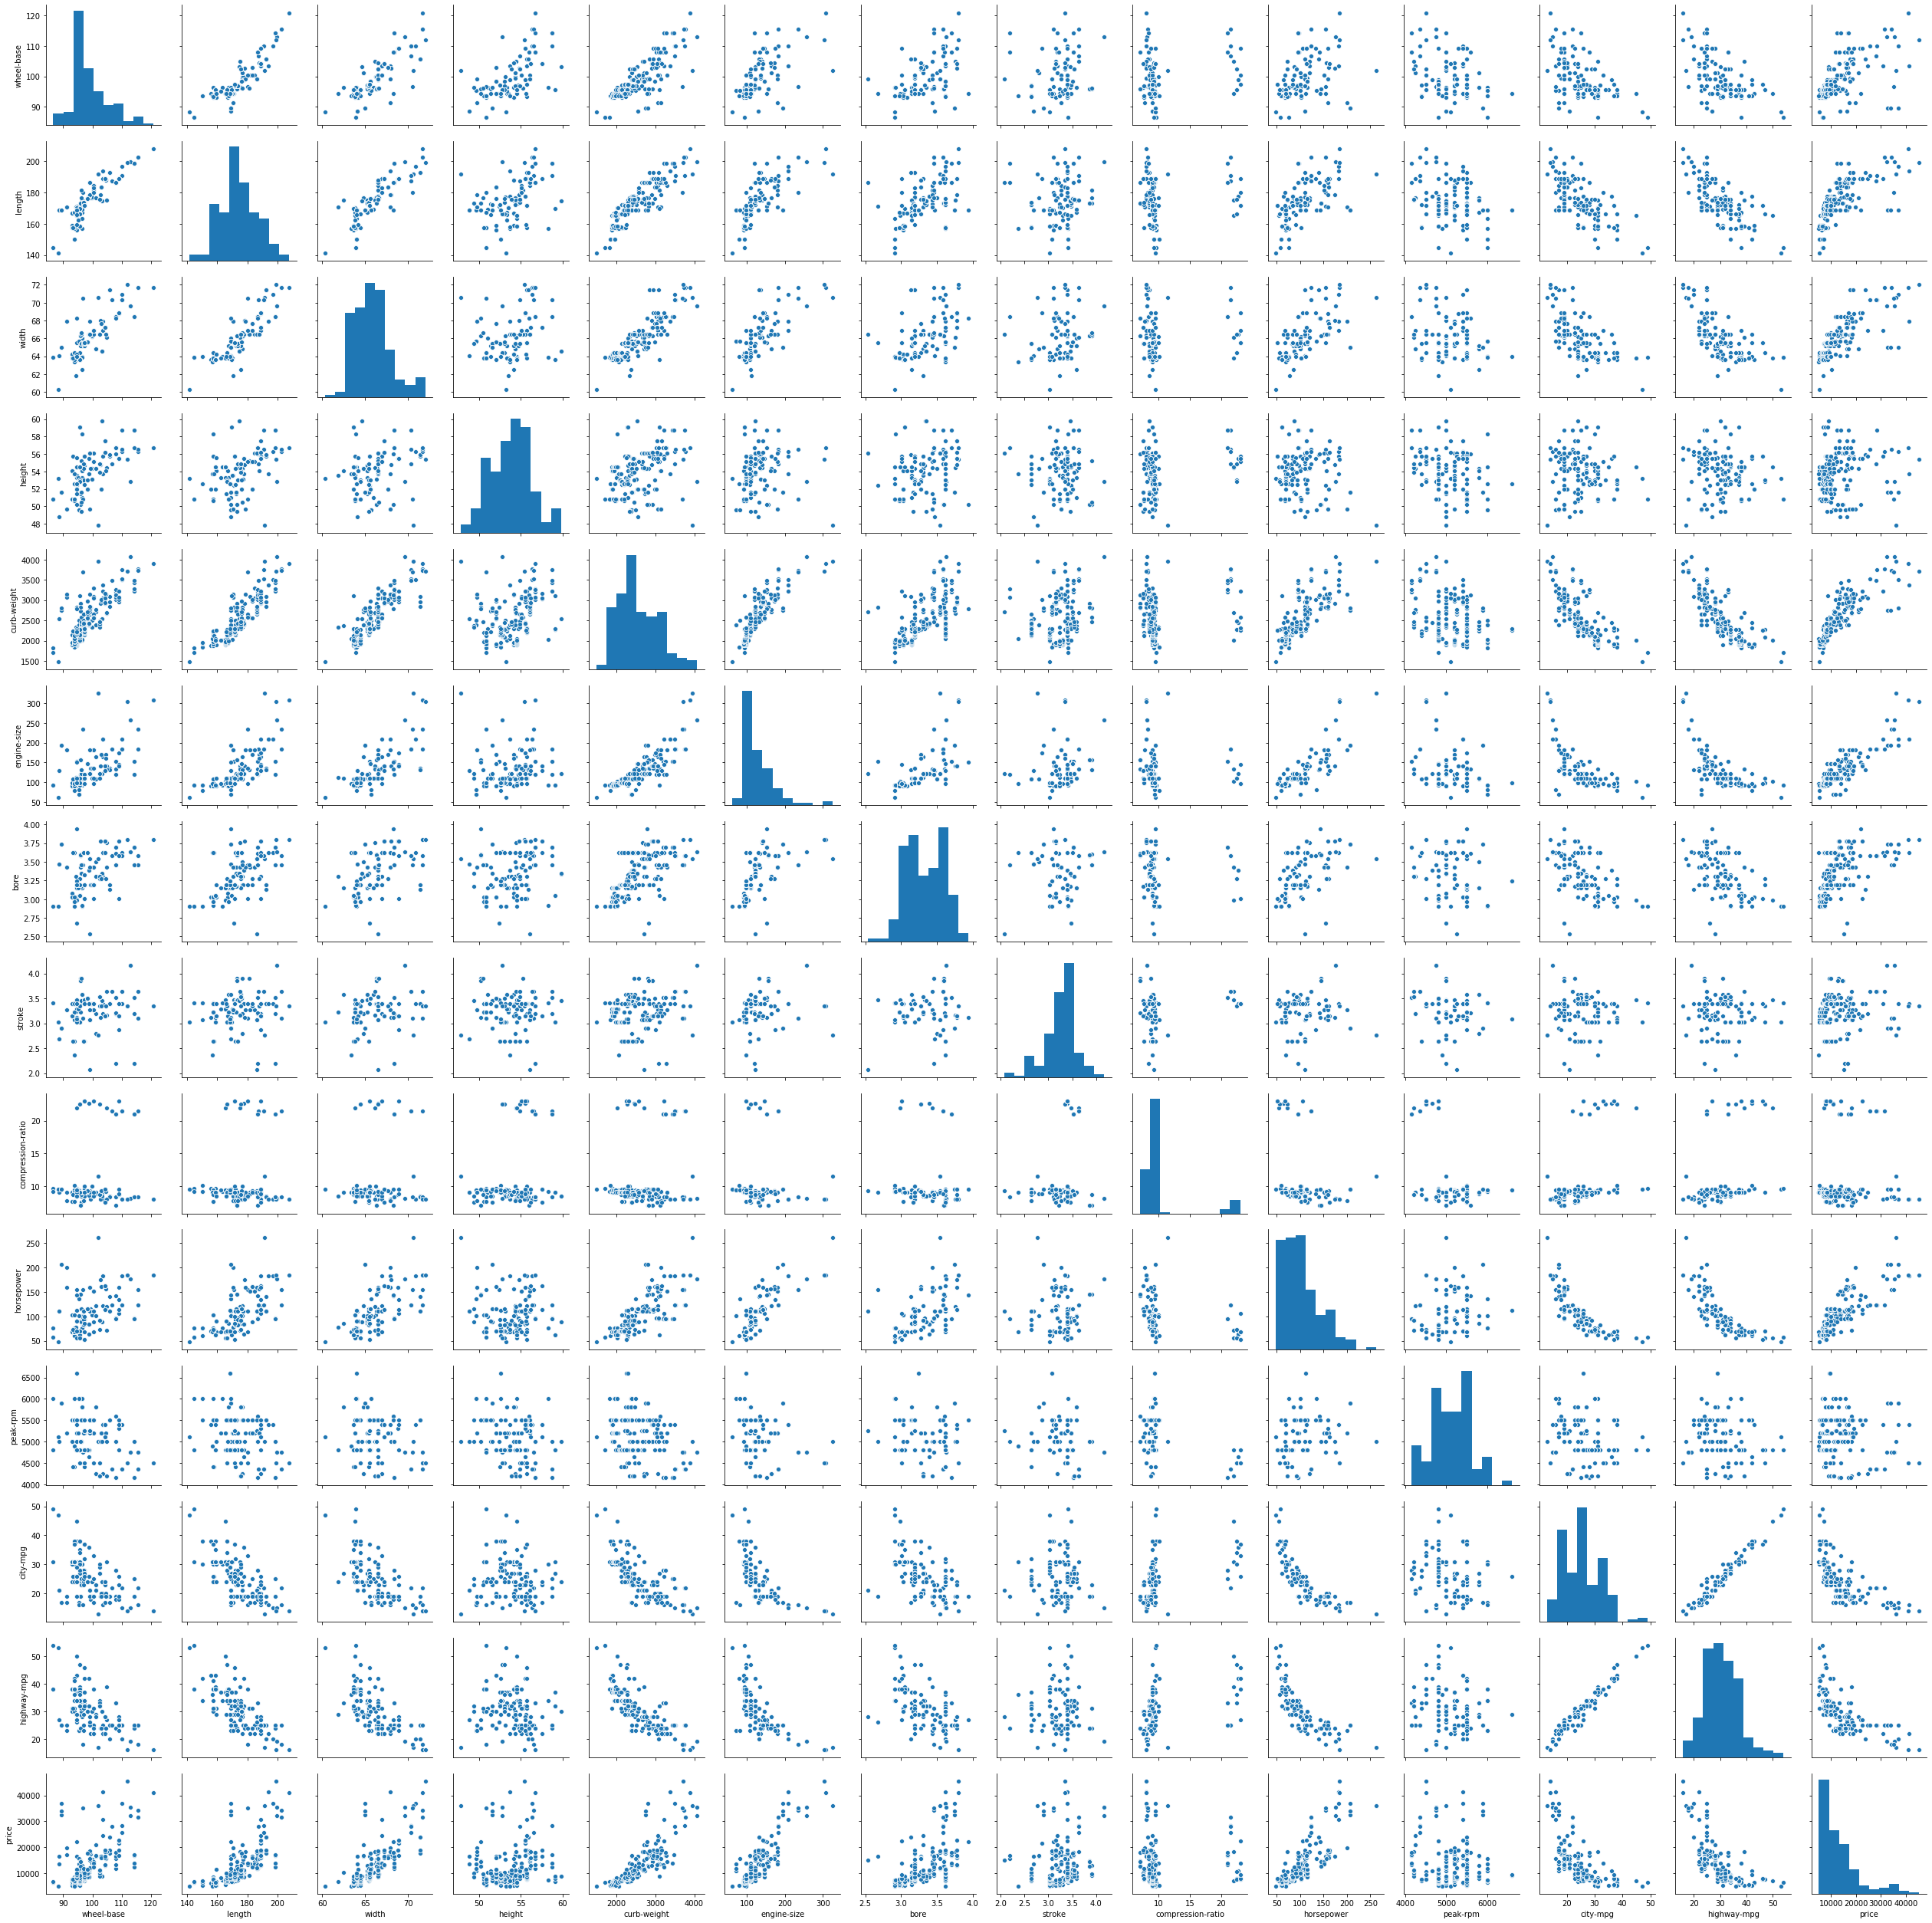

In [24]:
sns.pairplot(data=data)

### Question E: Related Variables

In order to better see the relationships in the correlation plots, I am going to have panda make a me a correlation matrix. 

In [25]:
# I create a new dataframe where I have dropped the price. This allows me to focus solely on the features
Features = data.drop(columns=["price"])
Features.corr()

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
wheel-base,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.494884,0.158502,0.250313,0.371621,-0.360593,-0.470606,-0.543304
length,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.610051,0.124139,0.159733,0.580309,-0.286321,-0.665192,-0.698142
width,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544924,0.188829,0.189867,0.615315,-0.245975,-0.633531,-0.680635
height,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.185907,-0.062704,0.259737,-0.087407,-0.311574,-0.049800,-0.104812
curb-weight,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644617,0.167562,0.156433,0.758063,-0.279375,-0.749543,-0.794889
engine-size,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.582857,0.209523,0.028889,0.822713,-0.256773,-0.650546,-0.679571
bore,0.494884,0.610051,0.544924,0.185907,0.644617,0.582857,1.000000,-0.055390,0.001250,0.568527,-0.277662,-0.592655,-0.599218
stroke,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.100040,-0.068300,-0.034696,-0.035201
compression-ratio,0.250313,0.159733,0.189867,0.259737,0.156433,0.028889,0.001250,0.187923,1.000000,-0.214576,-0.436015,0.331425,0.268465
horsepower,0.371621,0.580309,0.615315,-0.087407,0.758063,0.822713,0.568527,0.100040,-0.214576,1.000000,0.107882,-0.822617,-0.804596


As we would suspect there is clear correlation in similar categories. For example the wheel-base/length/width/curb-weight seem to have a higher correlation with each other. This might because they all fall under the category of body type. On the other something horsepower/city-mpg/highway-mpg all fall under similar categories. And thuse thye have strong correlations. 

It seems that the the two MPG correlations are pretty much the same. I would only choose to use one of them in the model. 
Also, the same applies to horsepower and engine-size. They have a correltiona of .82 showing that they are extremely similar. So I would drop engine size and focus solely on Horsepower. The same relationship applies to curb-weight/length/width is also clearly visible. They all have high correlations in the point .80s and higher. The graphs show a very clear similar distribution. 

## Problem 2

### Question A: Proposed Linear Models

The best way to decide which features to use would be running Lasso or Principal Component Analysis. I haven't had to choose my own features since elementary statistics class in 2010. So this should be interesting. 

1. The first model I propose is a sort of null model. Basically a model running all of the 13 features. With this model I can establish a baseline to compare the performance of models with smaller features. 
    - price = wheel-base + length + width + height + curb-weight + engine-size + bore + stroke + compression-ratio + horsepower + peak-rpm + city-mpg + highway-mpg

2. The second model would be the least feature model. Meaning that for this model I would try to use the least amount of features. The features chosen are comming directly from correlation. So this model is at the very low range of the spectrum. And I am dropping features that did not show any correlation with price or anything else in the previous exercises. 
    - price = curb-weight + horsepower + city-mpg
    
3. The third model would be a more balanced model. I would try to drop some features but include a few more that were in the medium correlation levels. This should be a more balanced model that is probably closer to what Lasso or PCA would tell me to do. 
    - price = length + curb-weight + engine-size + horsepower + city-mpg + compression-ratio

#### Question B: Analyzing First Model

##### i) Perform Linear Regression

The first model was the base model. It utilize all features that we were assigned to use in the assignment. 

In [51]:
# Call Linear Regression
Linear_Model_1 = LinearRegression()
Linear_Model_1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Here we proceed to set up the columns that we want to use in our model. 

In [52]:
# We first set a new dataframe
Model_1 = Model.copy()

# Create the X Variables in our model
X = Model_1[["wheel-base", "length", "width", "height", "curb-weight", "engine-size", "bore", "stroke",
               "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg"]]

# Create the Y Variable in our model
Y = Model_1["price"]

In [53]:
# Now We Proceed to run the linear regression
Linear_Model_1.fit(X,Y)

print("Intercept:", Linear_Model_1.intercept_)
print("Coefficients:", Linear_Model_1.coef_)

Intercept: -62068.15319037426
Coefficients: [ 7.04671241e+01 -8.97337480e+01  6.20846258e+02  3.19938816e+02
  1.71246392e+00  1.26674808e+02 -9.18710926e+02 -2.96297261e+03
  2.39724757e+02  3.80152790e+01  2.08564561e+00 -3.08035124e+02
  2.83956094e+02]


##### ii) R2

For here we can easily use scikit-learning function. 

In [60]:
Y_Hat = Linear_Model_1.predict(X)
r_square = r2_score(Y, Y_Hat)
print("R-Square:", r_square)

R-Square: 0.8568941111304017


So we got a pretty R2 for this model. This is using all the features. So in theory this is the best score we can get. If we reduce features are are not able to get to this score we have done something considerably wrong. 

##### iii) Scatterplot

For this part I will simply use matplot and seaborn to make some nice graphs. 

Text(0, 0.5, 'Predicted Price')

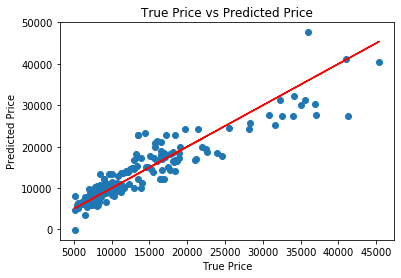

In [69]:
# Plot Scatter Plot
ax1 = plt.scatter(Y, Y_Hat)
# Plot Line
ax1 = plt.plot(Y, Y, c='red')
# Make Graph Nice
plt.title("True Price vs Predicted Price")
plt.xlabel("True Price")
plt.ylabel("Predicted Price")

Text(0, 0.5, 'Error')

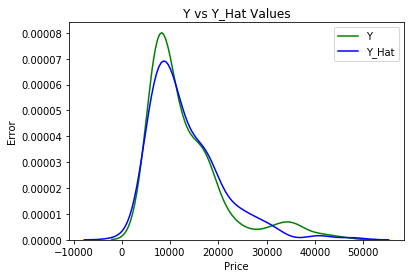

In [75]:
ax2 = sns.distplot(Y, hist=False, color='g', label="Y")
ax2 = sns.distplot(Y_Hat, hist=False, color='b', label = "Y_Hat")
plt.title("Y vs Y_Hat Values")
plt.xlabel("Price")
plt.ylabel("Fitness")

##### iv) Impression of Model

My impression is that this is a very good model. The predicted prices compare pretty nicely. We can see the overal shape taking place. The model is particularly good in predicting cars in the range from 10,000 - 20,000. This is probably because we have the most data in this range. The model starts being very bad after the 20,000 price range. This might be due to a lack of data in that range. Overall this is a pretty good baseline model that I can use to compare its performance with the next few models. 

#### Question C: Proposed Model #2

Proposed Model: price = curb-weight + horsepower + city-mpg

##### i) Perform Linear Regression

In [78]:
# Call Linear Regression
Linear_Model_2 = LinearRegression()
Linear_Model_2

# We first set a new dataframe
Model_2 = Model.copy()

# Create the X Variables in our model
X = Model_2[["curb-weight", "horsepower", "city-mpg"]]

# Create the Y Variable in our model
Y = Model_2["price"]

# Now We Proceed to run the linear regression
Linear_Model_2.fit(X,Y)

print("Intercept:", Linear_Model_2.intercept_)
print("Coefficients:", Linear_Model_2.coef_)

Intercept: -26414.57332038961
Coefficients: [  8.85397529 110.40317119 220.84231988]


##### ii) R2

In [79]:
Y_Hat = Linear_Model_2.predict(X)
r_square = r2_score(Y, Y_Hat)
print("R-Square:", r_square)

R-Square: 0.7795260379066234


##### iii) Scatterplot

Text(0, 0.5, 'Predicted Price')

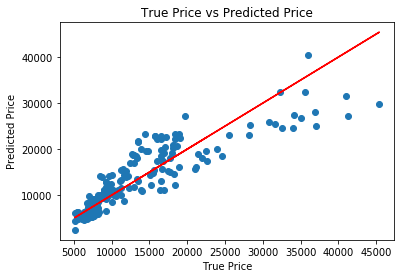

In [81]:
# Plot Scatter Plot
ax1 = plt.scatter(Y, Y_Hat)
# Plot Line
ax1 = plt.plot(Y, Y, c='red')
# Make Graph Nice
plt.title("True Price vs Predicted Price")
plt.xlabel("True Price")
plt.ylabel("Predicted Price")

Text(0, 0.5, 'Fitness')

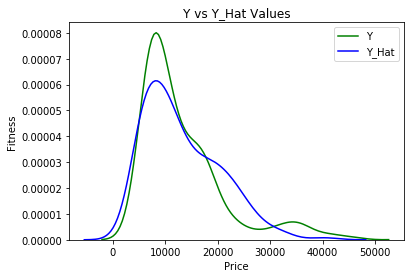

In [82]:
ax2 = sns.distplot(Y, hist=False, color='g', label="Y")
ax2 = sns.distplot(Y_Hat, hist=False, color='b', label = "Y_Hat")
plt.title("Y vs Y_Hat Values")
plt.xlabel("Price")
plt.ylabel("Fitness")

##### iv) Impression of Model

Well this model is not very good. I mean its only using three features and I only dropped .10 in R2. So that is not bad. But it does show that I need to use some more features to be able effectively the model. The model does particularly well in predicting the price from 0 - 10,000 but it then starts to underperform. It captures the major trends but it is obvious that the mdoel needs to perform slightly better. My impression is that this model could be improved. 

#### Question D: Proposed Model #3

Proposed Third Model

price = length + curb-weight + height + horsepower + city-mpg + compression-ratio

In [91]:
# Call Linear Regression
Linear_Model_3 = LinearRegression()
Linear_Model_3

# We first set a new dataframe
Model_3 = Model.copy()

# Create the X Variables in our model
X = Model_3[["length","curb-weight", "horsepower","engine-size", "city-mpg", "compression-ratio"]]

# Create the Y Variable in our model
Y = Model_3["price"]

# Now We Proceed to run the linear regression
Linear_Model_3.fit(X,Y)

print("Intercept:", Linear_Model_3.intercept_)
print("Coefficients:", Linear_Model_3.coef_)

Intercept: -17119.50602269183
Coefficients: [ 38.58612598   1.68374011  53.15476587 100.98595441 -38.21964922
 185.91064508]


##### ii) R2

In [90]:
Y_Hat = Linear_Model_3.predict(X)
r_square = r2_score(Y, Y_Hat)
print("R-Square:", r_square)

R-Square: 0.8306725574696255


##### iii) Scatterplot

Text(0, 0.5, 'Predicted Price')

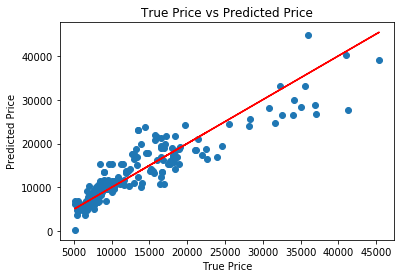

In [92]:
# Plot Scatter Plot
ax1 = plt.scatter(Y, Y_Hat)
# Plot Line
ax1 = plt.plot(Y, Y, c='red')
# Make Graph Nice
plt.title("True Price vs Predicted Price")
plt.xlabel("True Price")
plt.ylabel("Predicted Price")

Text(0, 0.5, 'Fitness')

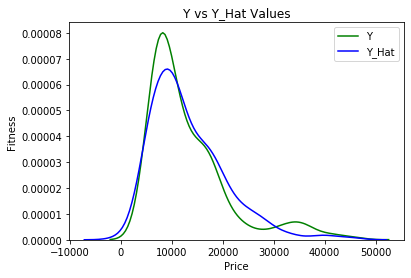

In [93]:
ax2 = sns.distplot(Y, hist=False, color='g', label="Y")
ax2 = sns.distplot(Y_Hat, hist=False, color='b', label = "Y_Hat")
plt.title("Y vs Y_Hat Values")
plt.xlabel("Price")
plt.ylabel("Fitness")

##### iv) Impression of Model

This model did suprising well. Using all the features the max score I could get was 0.87. Using only 6, less than half of the features, I was able to effectively get 0.03 less than the benchmark score. The model does pretty good for the 0-$20,000 price rage. it starts doing bad after that. This might have something to do with the limitations of data. 

#### Question E: Which model? 

I would choose my last model. The third model is superior because it utilized only the six most important features visible in my correlation analysis. So I am able to get a very similar score only using the six most important features. If computational resources were an issue then obviosly that would be the best model for me to use. 